# Part 01 - Preliminary EDA
These are the things I typically do whenever I get a new dataset to work with. What I want to accomplish with the dataset (it can be either modeling or just pure analysis) does not matter at this stage. All I want to do is to get to know my dataset just a bit, so that I can START TO ASK THE RIGHT QUESTION to my data (sort of).

Sections are:
- Checking Dtypes (Fixing if necessary)
- Uniqueness check
- Missing Value check
- Distribution check of the features on the univariate level. (sometimes I do multivariate level when I feel like features are correlated among them or with the target)

In [25]:
# Importing the dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

In [26]:
# Read the dataset
anime_df = pd.read_csv("./data/anime.csv")

In [27]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [28]:
anime_df.shape

(12294, 7)

- We have 12294 animes in the database

### Dtypes Check

- Here I'm basically checking whether the datatype represented in the dataset conforms to the datatype the column values should be in. For example: here **episodes** column encoded as object! This is countable and by nature numeric. Thus its better to represent it in numeric. It will allow us to use pandas built in methods for statistical analysis like min(),max().
- yes! For any kind of modeling you need to convert everything to numbers! But for EDA it's not advisable!
- Its better to be extra careful when you are reading data from .csv format. AS CSV DOES NOT STORE ANY INFO REGARDING DTYPES WHILE PERSISTING! Use parquet whenever you can!

In [29]:
anime_df.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [30]:
# anime_df['episodes'] = anime_df['episodes'].astype(str).str.strip().astype(float)

I can't do this, as it results in error in casting. Lets see whats going on!

In [31]:
anime_df['episodes'].isnull().sum()

0

It says this column does not have any missing values! 

Lets look closely on the unique values it contains!

In [32]:
anime_df['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

- They encoded NULL values as 'Unknown' here. So Pandas treating it as string and cant cast this to numeric! This happens quite often. This is actually no one's fault. You may blame the data collector. But understand that collector has no way of knowing which technology will be used to handle the data.
- Its better to be careful about this most of the time! I have seen empty string '' being encoded as missing values too! Which was painful to find out in the first place! If you can try to get the metadata about the dataset and see if there's any information regarding this. This will save you a lot of time!



In [33]:
anime_df[anime_df['episodes'] == 'Unknown'].count()

anime_id    340
name        340
genre       329
type        315
episodes    340
rating      188
members     340
dtype: int64

- There's 340 values in episodes columns encoded as Unknown. Its noticable that if it encoded as Unknown chances of value missing in other columns are high. Maybe these are obscure animes. Will check into details on this later.
- But first lets change it to np.nan

In [34]:
# anime_df['episodes'].replace('Unknown',np.nan,inplace=True)
# anime_df['episodes'] = anime_df['episodes'].astype(str).astype('float16')

# these two lines can be combined with this:

anime_df['episodes'] = pd.to_numeric(anime_df['episodes'],errors='coerce',downcast='integer')

In [35]:
anime_df[anime_df['episodes'] == 'Unknown'].count()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [36]:
# Just a little sanity check!
anime_df['episodes'].isnull().sum()

340

### Uniqueness Check

The reason you should do this is because most databases are not *normalized*! 

In [37]:
anime_df.anime_id.is_unique

True

In [38]:
anime_df.name.is_unique

False

- Though all the anime_id's are unique not all name of the anime's not unique

In [39]:
anime_df['name'].nunique()

12292

- 2 values causing the problem

Lets find those

In [40]:
anime_df[anime_df['name'].duplicated()]['name'].values

array(['Saru Kani Gassen', 'Shi Wan Ge Leng Xiaohua'], dtype=object)

- Its weird they are seen as duplicated! Which they certainly arent! Will check how to solve this inconsistencies later

### Missing Values Check

- Previously we have encountered how this dataset encodes missing value in format that is not handled automatically by Pandas! So we have to extra careful here

In [41]:
for col in anime_df.columns:
    print(f"{col} : {anime_df[col].isnull().sum()}")

anime_id : 0
name : 0
genre : 62
type : 25
episodes : 340
rating : 230
members : 0


- will handle missing values in **genre, type and rating** later

In [42]:
anime_df['type'].unique().tolist()

['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan]

- Looks good for now!

### Lets check some distribution of our features

##### Type

In [43]:
anime_df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

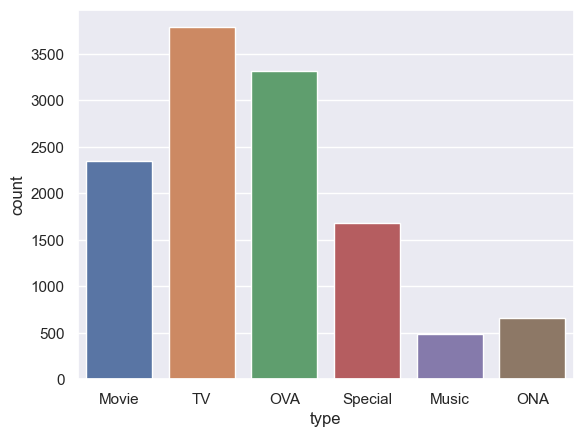

In [44]:
# visualizing is always better
# as this is a categorical variable I'm using bar plot
# which is implemented as countplot in seaborn
sns.countplot(x=anime_df['type'])
plt.show()

#### Episodes

In [45]:
anime_df['episodes'].describe()

count    11954.000000
mean        12.382550
std         46.865352
min          1.000000
25%          1.000000
50%          2.000000
75%         12.000000
max       1818.000000
Name: episodes, dtype: float64

- its interesting that at 75th percentile the number of episodes per anime is about 12 which is approximately same as the mean of this distribution!

Lets plot the distribution
- As this distribution is heavily skewed, Its better to visualize it in the log scale

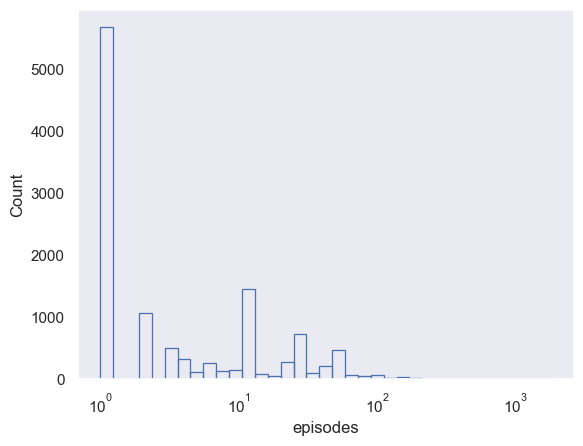

In [46]:
sns.histplot(data=anime_df,x='episodes',log_scale=True,fill=False)
plt.grid(False)
plt.show()

#### Rating

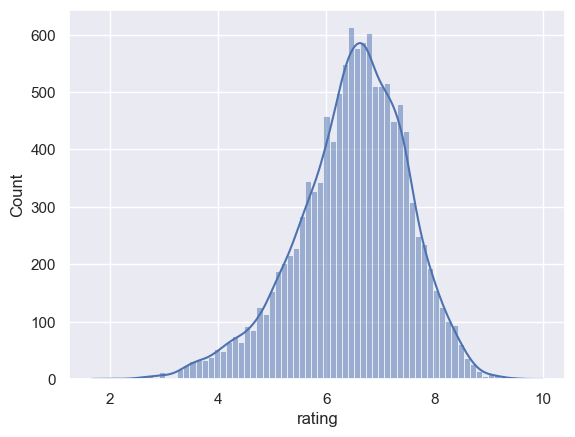

In [47]:
sns.histplot(data=anime_df, x="rating",kde=True)
plt.show()

- seems like rating follows a nice normal distribution

### End Notes:
- At this point my premilinary EDA is done! 
- Next step is basically me generating questions my dataset can answer, and trying to implement that in code! Which is for part 2!

In [48]:
# Lets just save this anime_df to pickle
# You should use DVC to track the data lineage! Let's not do this now!
anime_df.to_pickle("./dataframes/anime_df_afterPRE-EDA")